## Preprocessing Data

Filter out English news articles.

In [1]:
from preprocess import filter_english_news

english_news = filter_english_news()

Processed 'Data/Datasets/Health_News.csv': Selected 200 English articles
Processed 'Data/Datasets/Covid_and_Vaccine_News.csv': Selected 200 English articles
Processed 'Data/Datasets/Covid_News.csv': Selected 200 English articles
Processed 'Data/Datasets/Science_&_Technology_News.csv': Selected 200 English articles
Processed 'Data/Datasets/World_Politics_News.csv': Selected 200 English articles

Summary:
Total input articles processed: 19520
Total English articles selected: 1000
Results saved to Data/Processed_Data/combined_english_news.csv


## Get NER extraction from default and custom model

Default spaCy NER

In [1]:
!pip3 install -U spacy -q

In [2]:
!python3 -m spacy info


============================== Info about spaCy ==============================

spaCy version    3.8.5                         
Location         /home/em/cmpt413/CMPT413/venv/lib/python3.10/site-packages/spacy
Platform         Linux-6.8.0-57-generic-x86_64-with-glibc2.35
Python version   3.10.12                       
Pipelines                                      



In [3]:
!python3 -m spacy download en_core_web_lg

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.7/400.7 MB 378.7 kB/s eta 0:00:00m eta 0:00:010:00:14
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


In [4]:
import NER_extraction

NER_extraction.set_nlp("en_core_web_lg")
NER_extraction.set_output("Data/Processed_Data/healthcare_articles_with_entities.csv")

default_ner = NER_extraction.extract()

Custom NER model

In [6]:
from custom_NER import train_NER

train = train_NER()

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 272/272 [00:00<00:00, 838.60it/s]


Training the custom NER model

In [7]:
!python3 -m spacy init config config.cfg --lang en --pipeline ner --optimize accuracy --force

⚠ To generate a more effective transformer-based config (GPU-only),
install the spacy-transformers package and re-run this command. The config
generated now does not use transformers.
ℹ Generated config template specific for your use case
- Language: en
- Pipeline: ner
- Optimize for: accuracy
- Hardware: CPU
- Transformer: None
✔ Auto-filled config with all values
✔ Saved config
config.cfg
You can now add your data and train your pipeline:
python -m spacy train config.cfg --paths.train ./train.spacy --paths.dev ./dev.spacy


In [1]:
!python3 -m spacy train config.cfg --output ./ --paths.train ./training_data.spacy --paths.dev ./training_data.spacy

ℹ Saving to output directory: .
ℹ Using CPU

=========================== Initializing pipeline ===========================
✔ Initialized pipeline

============================= Training pipeline =============================
ℹ Pipeline: ['tok2vec', 'ner']
ℹ Initial learn rate: 0.001
E    #       LOSS TOK2VEC  LOSS NER  ENTS_F  ENTS_P  ENTS_R  SCORE 
---  ------  ------------  --------  ------  ------  ------  ------
  0       0          0.00     43.45    0.00    0.00    0.00    0.00
  1     200        170.70   1780.56   48.55   50.18   47.02    0.49
  2     400       3209.06   1686.26   55.38   69.50   46.03    0.55
  4     600       1589.97   1175.38   85.38   86.17   84.60    0.85
  7     800        233.17    651.67   90.48   91.25   89.74    0.90
 10    1000        424.34    468.80   95.67   94.36   97.02    0.96
 14    1200        863.40    349.70   96.78   96.54   97.02    0.97
 19    1400        181.93    295.76   97.18   97.34   97.02    0.97
 26    1600        101.28    169.77 

In [5]:
import spacy
from NER_extraction import extract

custom_ner = extract()

Read and label articles from healthcare_articles_with_custom_entities.csv 

## Stock Data


Date Range:
Start Date: 1999-11-01 00:00:00
End Date: 2025-04-04 00:00:00

First few rows of the data:
             Open   High    Low  Close  Volume      8_EMA  200_SMA
1999-11-01  28.30  28.30  28.13  28.19   22400  28.190000      NaN
1999-11-02  28.28  28.33  27.80  27.83   19900  28.110000      NaN
1999-11-03  28.03  28.03  27.73  27.95    7400  28.074444      NaN
1999-11-04  28.13  28.38  28.13  28.27    8800  28.117901      NaN
1999-11-05  28.66  28.66  28.14  28.14   23600  28.122812      NaN

Summary Statistics:
              Open         High          Low        Close        Volume  \
count  6396.000000  6396.000000  6396.000000  6396.000000  6.396000e+03   
mean     62.495760    62.871073    62.090338    62.499826  6.071960e+06   
std      39.443246    39.662252    39.224426    39.453820  5.539204e+06   
min      21.750000    22.100000    21.000000    21.880000  9.000000e+02   
25%      30.300000    30.468000    30.070000    30.270000  9.567750e+05   
50%      38.070000    3

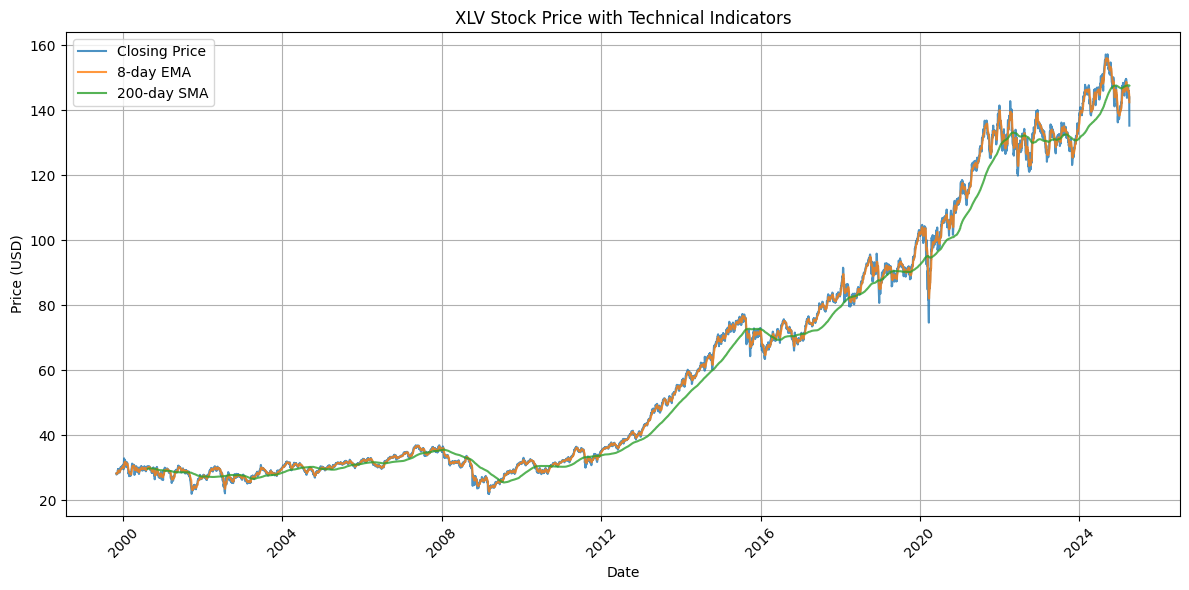

In [8]:
%run XLV.py

## BERT Models

In [2]:
%run FinBERT_Recent_News.py

/home/em/cmpt413/CMPT413/venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2025-04-05 15:54:00.887166: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1743893641.668196   25605 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1743893641.817949   25605 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1743893643.333520   25605 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once

Processing articles...
Results saved to Data/Processed_Data/Recent_News_FinBERT.csv


In [4]:
from FinBERT_csv import process_csv

FinDB = process_csv()
print(FinDB.head()) 


Initializing FinBERT analyzer...

Initializing FinBERT model and tokenizer...
Model and tokenizer initialized successfully

Reading CSV file from Data/Processed_Data/combined_english_news.csv
Successfully read CSV file with 1000 rows


Analyzing articles: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [13:25<00:00,  1.24it/s]



Analysis complete. Processed 1000 articles.
  article_id category                                              title date  \
0          0           Pritzker Levine LLP, Robbins Geller Rudman &am...        
1          1           COP26: Patients from six children's hospitals ...        
2          2           ‘Smart bandage’ could help doctors to monitor ...        
3          3           Coronavirus: cruise giant Royal Caribbean appe...        
4          4           Amid 'great resignation,' group calls for more...        

   positive_score  neutral_score  negative_score  
0        0.887696       0.075809        0.036495  
1        0.831727       0.016469        0.151804  
2        0.392156       0.577058        0.030786  
3        0.027410       0.954987        0.017604  
4        0.152393       0.016323        0.831284  


Loading XLV price data...
Price data shape: (6393, 8)
Loading FinBERT sentiment data...
Initial sentiment data shape: (90, 13)
Extracted dates from 8 articles
Assigned dates to 82 articles without dates
Daily sentiment shape: (84, 3)
Shape after joining: (6393, 11)
Shape after date filtering: (3774, 11)
Final shape after dropping NaN: (3774, 11)

Sample of final data:
            Unnamed: 0   Open   High    Low  Close   Volume      8_EMA  \
Date                                                                     
2010-01-04  2010-01-04  31.47  31.62  31.27  31.61  5580900  31.433736   
2010-01-05  2010-01-05  31.56  31.67  31.30  31.30  5428600  31.404017   
2010-01-06  2010-01-06  31.30  31.62  31.30  31.62  4883600  31.452013   
2010-01-07  2010-01-07  31.50  31.73  31.43  31.73  6114600  31.513788   
2010-01-08  2010-01-08  31.79  31.81  31.56  31.78  4284800  31.572946   

              200_SMA  positive_score  neutral_score  negative_score  
Date                                   

2025-04-05 16:22:42.558134: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


Epoch 1/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 17s 81ms/step - loss: 0.0313 - val_loss: 0.0011
Epoch 2/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 5s 87ms/step - loss: 7.8428e-04 - val_loss: 0.0011
Epoch 3/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 4s 70ms/step - loss: 6.7945e-04 - val_loss: 0.0011
Epoch 4/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 5s 66ms/step - loss: 6.8523e-04 - val_loss: 7.8797e-04
Epoch 5/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 3s 67ms/step - loss: 6.1306e-04 - val_loss: 7.9556e-04
Epoch 6/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 5s 59ms/step - loss: 5.7422e-04 - val_loss: 7.6429e-04
Epoch 7/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 6s 71ms/step - loss: 5.6704e-04 - val_loss: 8.1258e-04
Epoch 8/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 3s 63ms/step - loss: 4.9197e-04 - val_loss: 0.0011
Epoch 9/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 5.2286e-04 - val_loss: 9.1526e-04
Epoch 10/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 4.7396e-04 - val_loss: 6.7595e-04
Epoch 11/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 4.4707e-04 - val_

Final model saved to models/lstm_finbert_model_XLV.h5
Train RMSE: 1.58, Test RMSE: 6.27


/home/em/cmpt413/CMPT413/LSTM_FinBERT.py:186: RuntimeWarning: divide by zero encountered in divide
  confidence = 1 - (errors / max_error)



Predicted price for next day: $135.92
Confidence level: -inf%
No trading signal - confidence below threshold
Predictions saved to lstm_finbert_predictions_XLV.csv


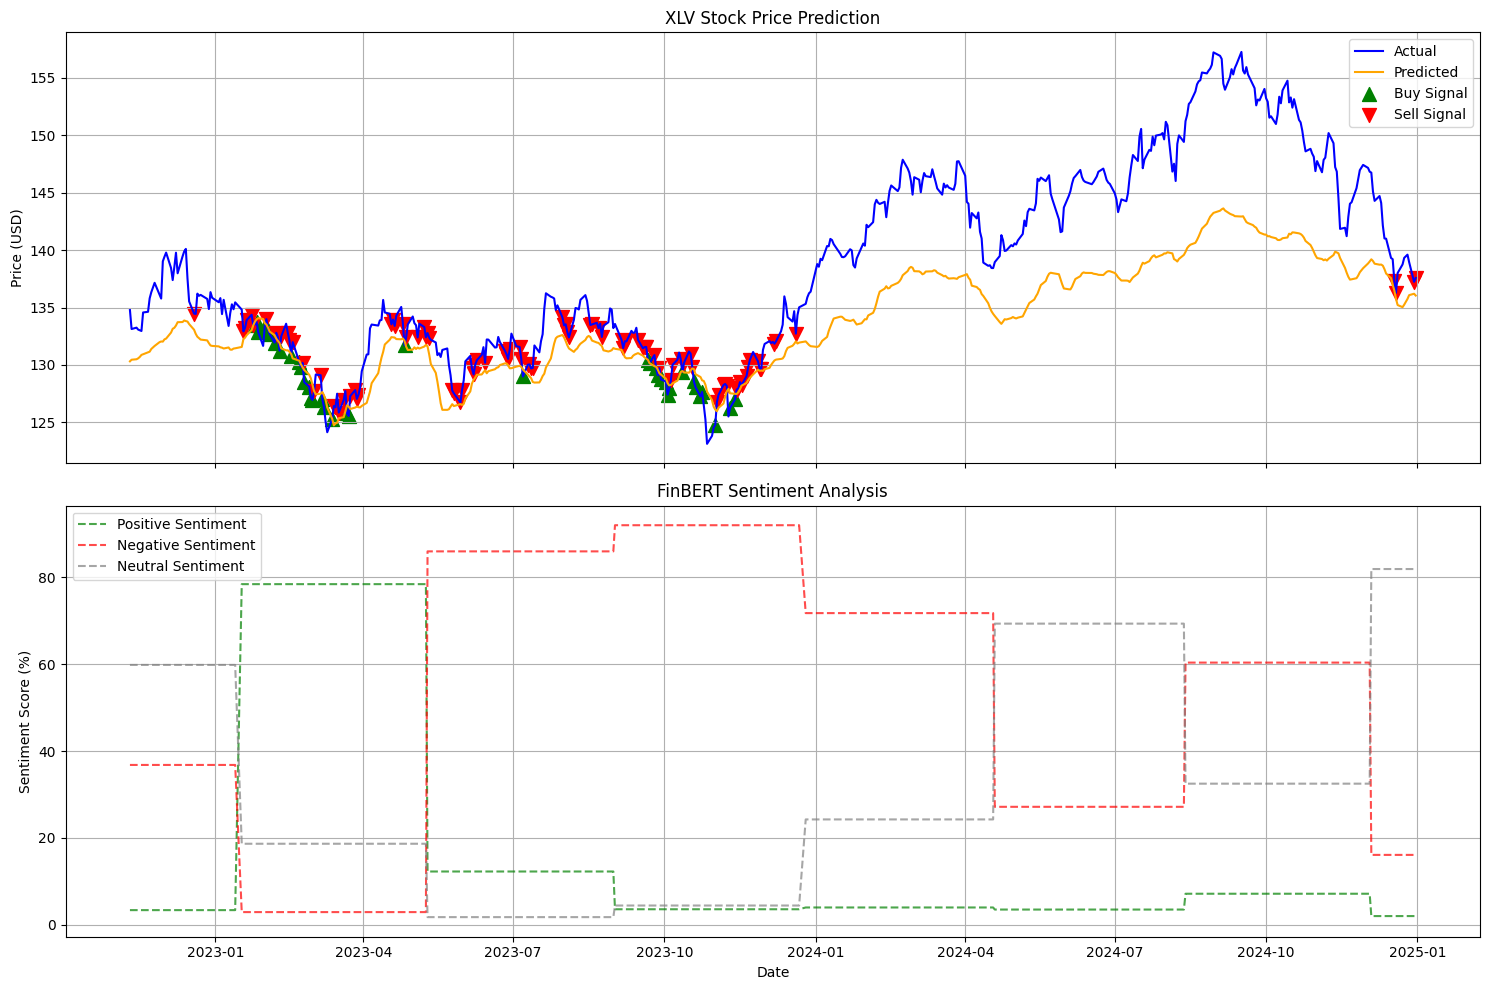

In [5]:
from LSTM_FinBERT import main

Fin_predict = main()

inst to run HBERT_recent_news.py

In [12]:
import pandas as pd

df = pd.read_csv('Data/Processed_Data/Recent_News_HBERT.csv')
print(df.head()) 

                                               title  \
0       4 Bedroom Home in CHARLOTTESVILLE - $575,000   
1               3 Bedroom Home in Lincoln - $689,000   
2     4 Bedroom Home in CHARLOTTESVILLE - $2,875,000   
3  AMIRI SS25 Combines 19th Century Western Trope...   
4  Frederique Constant Readies a Duo of Highlife ...   

                                                link keywords  \
0  https://dailyprogress.com/online/4-bedroom-hom...      NaN   
1  https://journalstar.com/online/3-bedroom-home-...      NaN   
2  https://dailyprogress.com/online/4-bedroom-hom...      NaN   
3  https://hypebeast.com/uk/2024/6/amiri-ss25-par...  fashion   
4  https://hypebeast.com/uk/2024/6/frederique-con...  watches   

                          creator  video_url  \
0                             NaN        NaN   
1                             NaN        NaN   
2                             NaN        NaN   
3  info@hypebeast.com (Hypebeast)        NaN   
4  info@hypebeast.com (Hypebeast

Loading XLV price data...
Price data shape: (6396, 8)
Loading HBERT sentiment data...
Initial sentiment data shape: (90, 13)
Extracted dates from 8 articles
Assigned dates to 82 articles without dates
Daily sentiment shape: (84, 3)
Shape after joining: (6396, 11)
Shape after date filtering: (3774, 11)
Final shape after dropping NaN: (3774, 11)

Sample of final data:
            Unnamed: 0   Open   High    Low  Close   Volume      8_EMA  \
Date                                                                     
2010-01-04  2010-01-04  31.47  31.62  31.27  31.61  5580900  31.433736   
2010-01-05  2010-01-05  31.56  31.67  31.30  31.30  5428600  31.404017   
2010-01-06  2010-01-06  31.30  31.62  31.30  31.62  4883600  31.452013   
2010-01-07  2010-01-07  31.50  31.73  31.43  31.73  6114600  31.513788   
2010-01-08  2010-01-08  31.79  31.81  31.56  31.78  4284800  31.572946   

              200_SMA  positive_score  neutral_score  negative_score  
Date                                     

Final model saved to models/lstm_hbert_model_XLV.h5
Train RMSE: 1.34, Test RMSE: 3.86

Predicted price for next day: $136.19
Confidence level: 99.00%
High confidence SELL signal
Predictions saved to lstm_hbert_predictions_XLV.csv


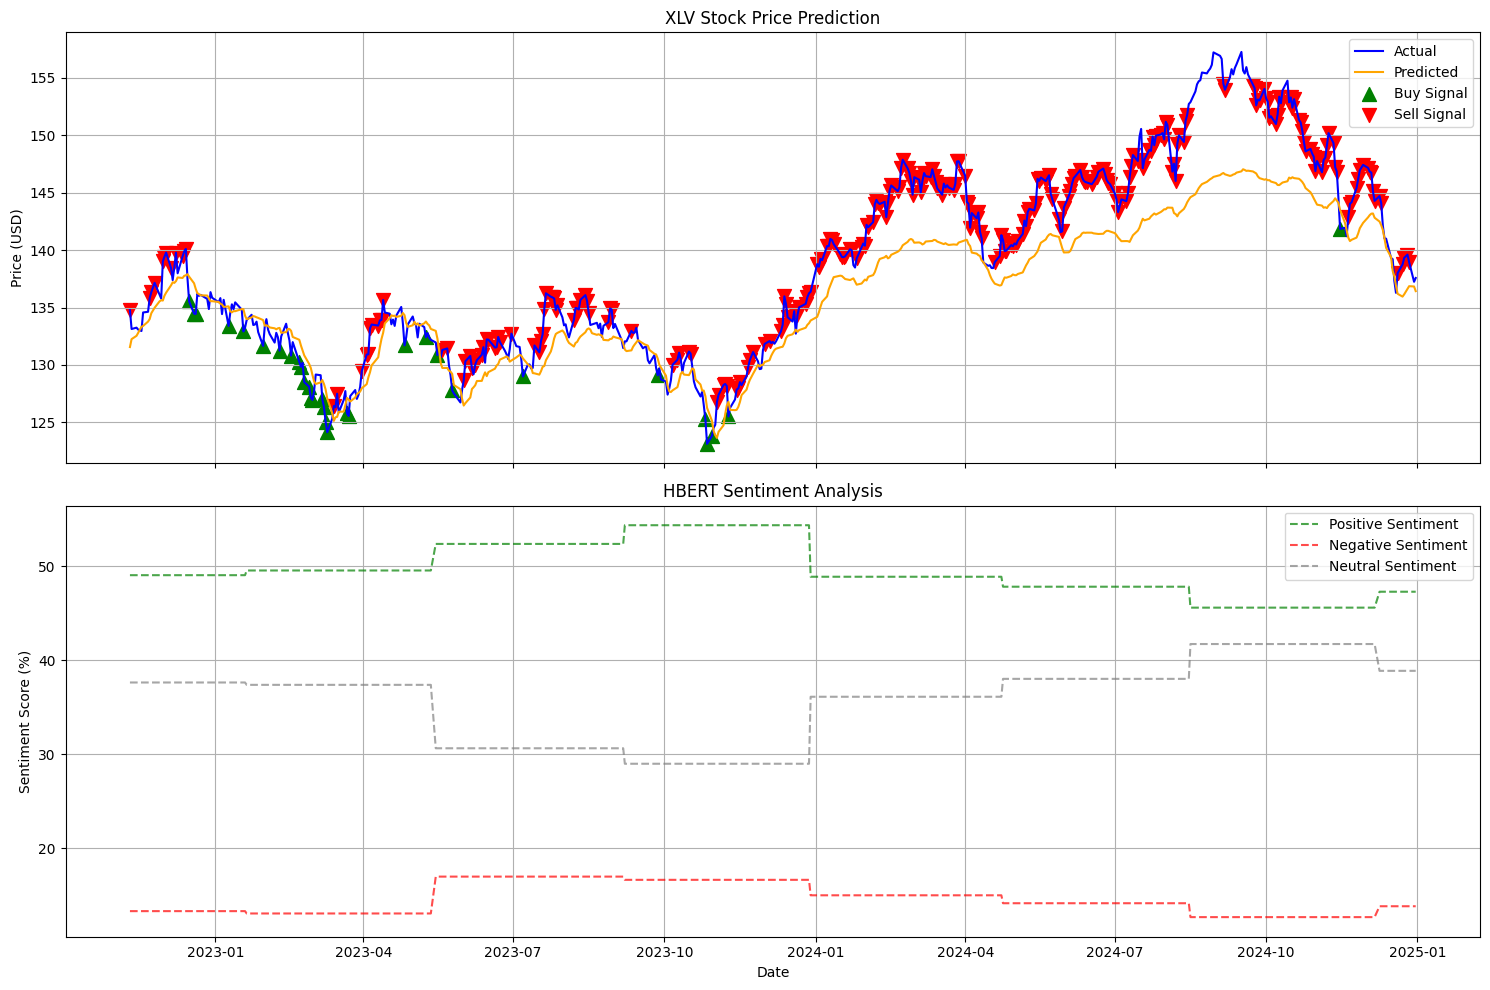

In [9]:
from LSTM_HBERT import main

HBERT_predict = main()

In [4]:
from evaluation import main

eval  = main()

/home/em/cmpt413/CMPT413/venv/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


LSTM-FinBERT Sentiment Metrics:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
F1 Score: 1.0000

Confusion Matrix:
[[ 41   0   0]
 [  0 198   0]
 [  0   0 298]]

H-BERT Sentiment Metrics:
Accuracy: 0.5549
Precision: 0.3080
Recall: 0.5549
F1 Score: 0.3961

Confusion Matrix:
[[  0   0  41]
 [  0   0 198]
 [  0   0 298]]

LSTM-FinBERT Stock Prediction Metrics:
Mean Absolute Error: 4.1255
R-squared Score: 0.6475

H-BERT Stock Prediction Metrics:
Mean Absolute Error: 2.1867
R-squared Score: 0.8969


Confusion matrix from evalution

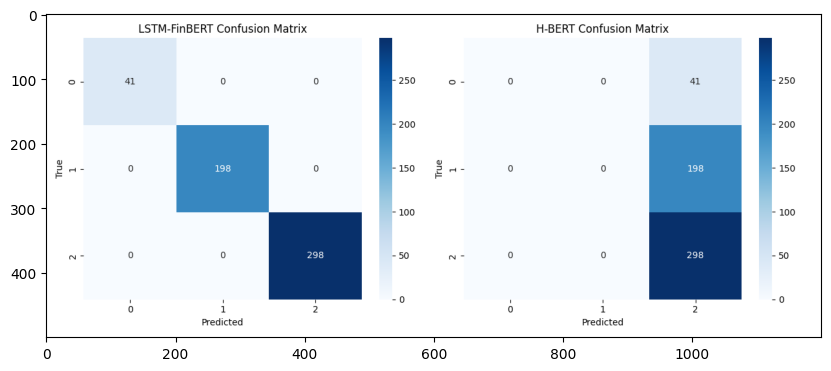

In [10]:
import matplotlib.pyplot as plt
import matplotlib.image as img

im = img.imread('Data/Figures/confusion_matrices.png')

plt.figure(figsize=(10,8))
plt.imshow(im)
plt.show()